In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
train =  pd.read_csv('C:/Users/ASUS/Documents/ASL-Clasify/Assets/sign_mnist_train.csv')
test = pd.read_csv('C:/Users/ASUS/Documents/ASL-Clasify/Assets/sign_mnist_test.csv')

In [48]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [49]:
labels = train['label'].values

In [50]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='count'>

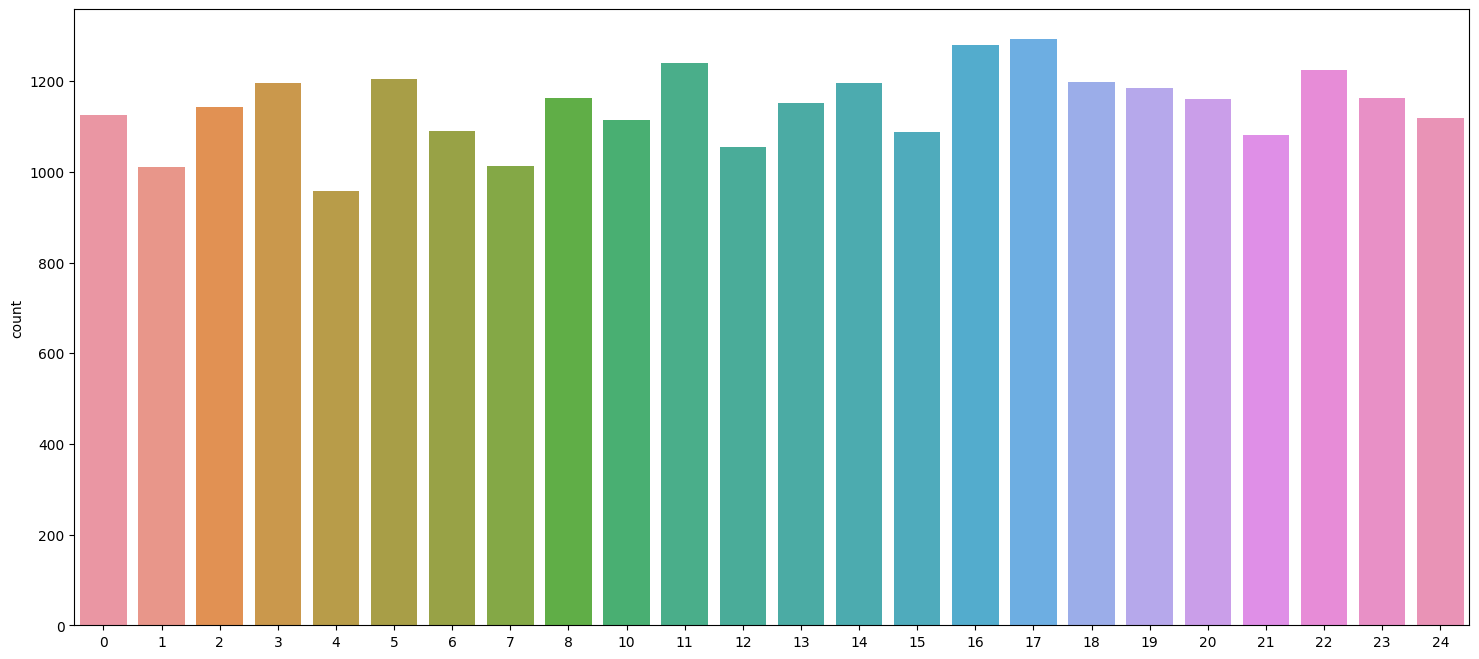

In [51]:
plt.figure(figsize=  (18,8))
sns.countplot(x =labels)

In [52]:
train.drop('label', axis = 1, inplace = True)

In [53]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [54]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [55]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


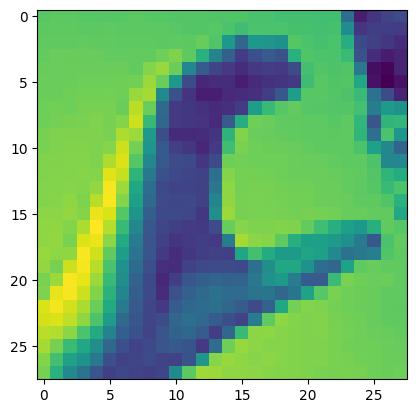

In [56]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [57]:
import cv2
import numpy as np
for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state= 101)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size = 128
num_classes = 24
epochs = 10

In [60]:
x_train= x_train/255
x_test = x_test/255

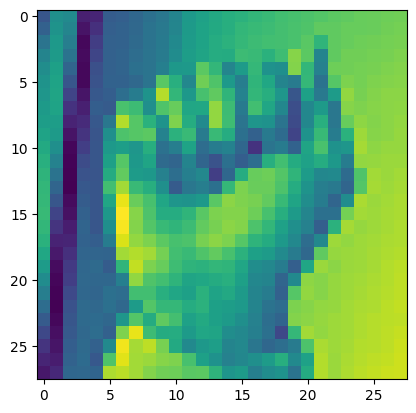

In [61]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

plt.imshow(x_train[0].reshape(28,28))



In [62]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0,20))

model.add(Dense(num_classes, activation = 'softmax'))


In [63]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=Adam(),
              metrics='accuracy')

In [64]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 64)         

In [65]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 14s 82ms/step - loss: 2.4008 - accuracy: 0.2739 - val_loss: 1.3972 - val_accuracy: 0.5422
Epoch 2/10
151/151 [==============================] - 12s 79ms/step - loss: 0.9682 - accuracy: 0.6818 - val_loss: 0.7893 - val_accuracy: 0.7313
Epoch 3/10
151/151 [==============================] - 12s 79ms/step - loss: 0.5572 - accuracy: 0.8195 - val_loss: 0.5170 - val_accuracy: 0.8293
Epoch 4/10
151/151 [==============================] - 12s 79ms/step - loss: 0.3504 - accuracy: 0.8932 - val_loss: 0.3127 - val_accuracy: 0.8954
Epoch 5/10
151/151 [==============================] - 12s 80ms/step - loss: 0.2098 - accuracy: 0.9421 - val_loss: 0.2058 - val_accuracy: 0.9340
Epoch 6/10
151/151 [==============================] - 12s 79ms/step - loss: 0.1305 - accuracy: 0.9644 - val_loss: 0.1052 - val_accuracy: 0.9737
Epoch 7/10
151/151 [==============================] - 12s 78ms/step - loss: 0.0765 - accuracy: 0.9832 - val_loss: 0.1121 - val_accuracy:

In [66]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("model saved")

model saved


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


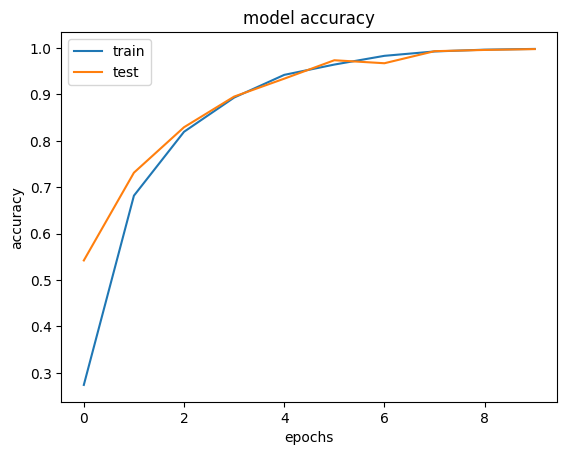

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [70]:
test_labels = test['label']
test.drop('label',axis=1, inplace= True)

test_images = test.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

test_images.shape
y_pred = model.predict(test_images)



225/225 [==============================] - 2s 8ms/step


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())


0.7877858337981037

In [ ]:
def getLetter(result):
    classLabels = {0: 'A',
                   1: 'B',
                   2: 'C',
                   3: 'D',
                   4: 'A',
                   5: 'E',
                   6: 'F',
                   7: 'G',
                   8: 'H',
                   9: 'I',
                   10: 'K',
                   11: 'L',
                   12: 'M',
                   13: 'N',
                   14: 'O',
                   15: 'P',
                   16: 'Q',
                   17: 'R',
                   18: 'S',
                   19: 'T',
                   20: 'U',
                   21: 'W',
                   22: 'X',
                   23: 'Y',
                   }
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"